<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Cardio%20Vascular%20Disease/Cardio_Vascular_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
random_forest = RandomForestClassifier(n_estimators=1000,random_state = 42)
svc_model = SVC(kernel = 'linear')
log_model = LogisticRegression()

In [5]:
data = pd.read_csv('cardio_train.csv',sep=";")

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.shape

(70000, 13)

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
correlation_matrix = data.corr()

Finding the co-relation betwwen the variables

<Axes: >

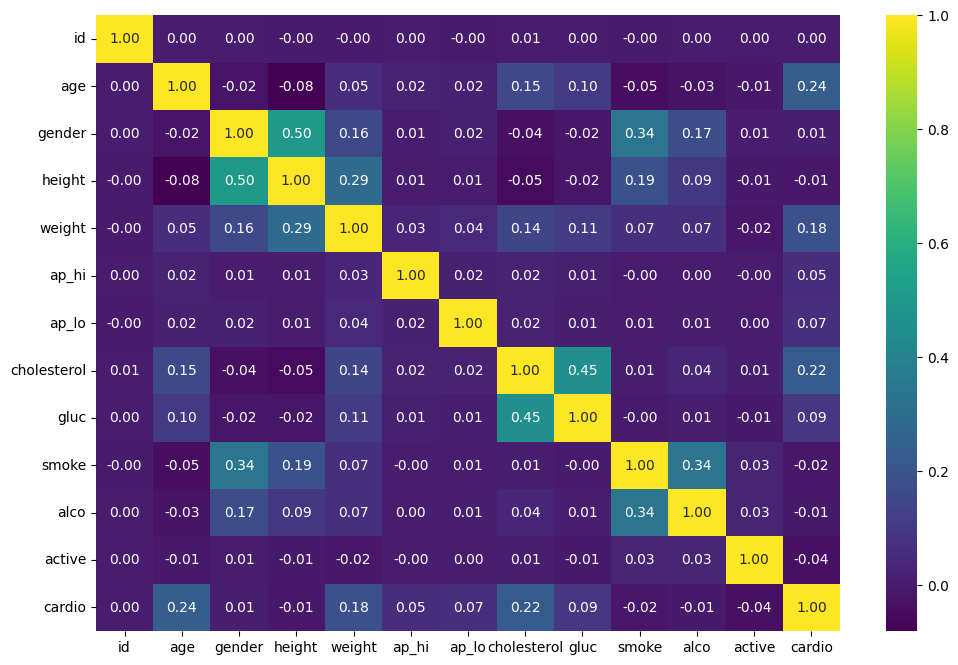

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix,cmap='viridis',annot=True,fmt=".2f")

Dropping the less contributing column in the dataset

In [11]:
data.drop(columns=['id','height'],inplace=True)

In [12]:
data.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,62.0,110,80,1,1,0,0,1,0
1,20228,1,85.0,140,90,3,1,0,0,1,1
2,18857,1,64.0,130,70,3,1,0,0,0,1
3,17623,2,82.0,150,100,1,1,0,0,1,1
4,17474,1,56.0,100,60,1,1,0,0,0,0


Finding the missing and duplicated values

In [13]:
data.isna().sum()

age            0
gender         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [14]:
data.duplicated().sum()

268

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

Splitting the data

In [17]:
X=data.iloc[:,:-1]
y=data['cardio']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((55785, 10), (13947, 10), (55785,), (13947,))

Classification using Random Forest

In [20]:
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6863
           1       0.70      0.70      0.70      7084

    accuracy                           0.70     13947
   macro avg       0.70      0.70      0.70     13947
weighted avg       0.70      0.70      0.70     13947



Classification using Support Vector Classifier

In [21]:
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      6863
           1       0.73      0.70      0.71      7084

    accuracy                           0.71     13947
   macro avg       0.71      0.71      0.71     13947
weighted avg       0.71      0.71      0.71     13947



Classification using Logistic regression

In [22]:
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63      6863
           1       0.63      0.55      0.59      7084

    accuracy                           0.61     13947
   macro avg       0.61      0.61      0.61     13947
weighted avg       0.61      0.61      0.61     13947

